# Perform Exploratory Data Analysis

#### Import Packages

In [1]:
import pandas as pd
import numpy as np

In [2]:
import lux
from lux.vis.VisList import VisList 
#lux.config.plotting_backend = "matplotlib"
lux.config.plotting_backend = "vegalite"

In [3]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None
import warnings
warnings.filterwarnings("ignore")

In [4]:
import missingno as msno
%matplotlib inline
from plotnine import *
from matplotlib import pyplot as plt

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning

#### Load Dataset

In [6]:
df =  pd.read_csv("../../01_consolidatedData/Model_BoardAttritionVSTenure_asof_15FEB.csv")
df = df.drop(['TSR'], axis=1)
df = df.rename(columns={"incindex_yoyTSR": "TSR"})
df = df.dropna()

In [7]:
lux_df = df.copy()
lux_df.set_data_type({'YearOfReport':'quantitative'})
lux_df = lux_df.replace([np.inf, -np.inf], np.nan)

In [8]:
df.describe(include='all')

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Missing Values ChecK

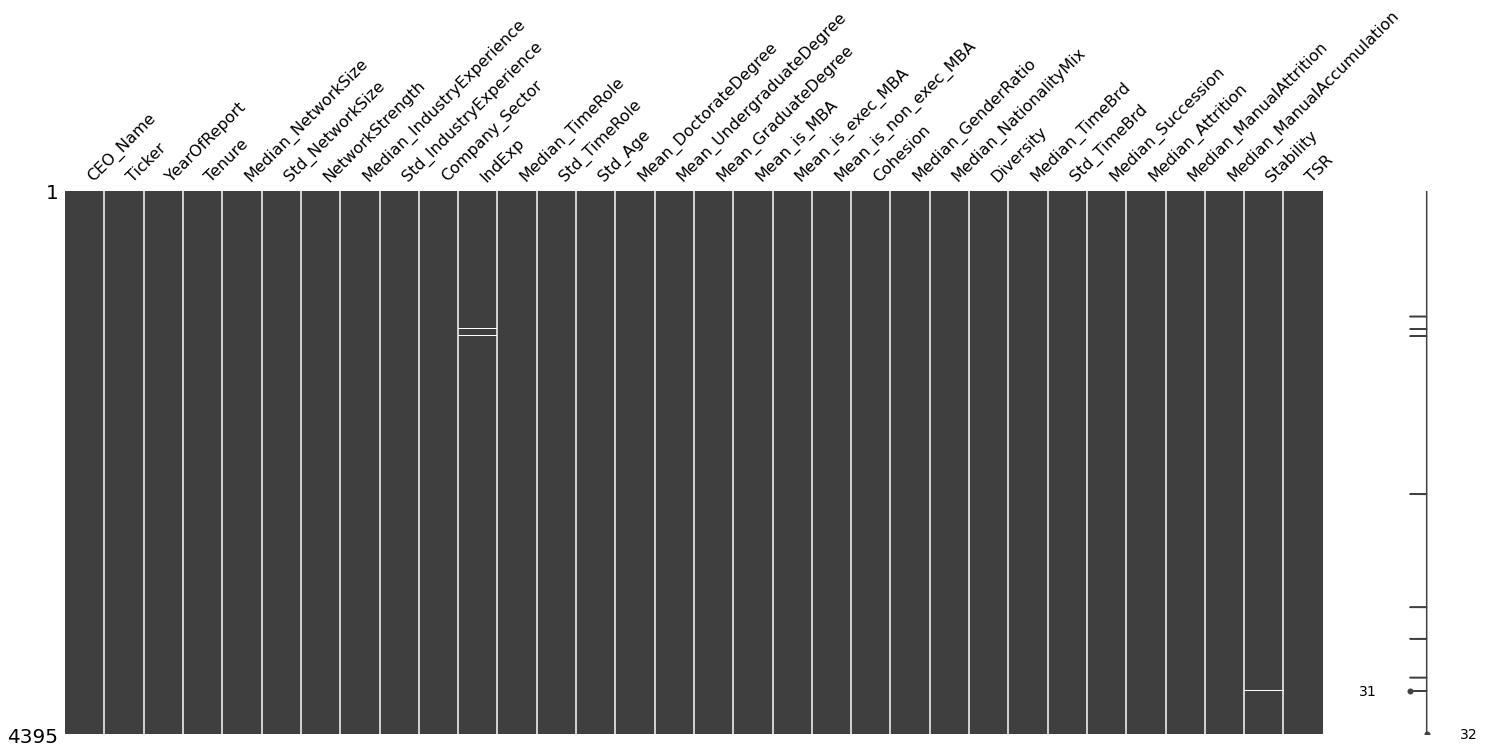

In [9]:
fig = msno.matrix(lux_df)

### EDA

In [10]:
all_features = VisList(["?", "TSR"], lux_df)
all_features

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…

### GGPLOT

Features of Interest

 - Median_Succession
 - Company_Sector
 - Ticker
 - Median_NationalityMix
 - CEO_Name
 - Median_Attrition



Random Intercept with 
Tenure, Company_Name/Company_Sector, CEO_Name


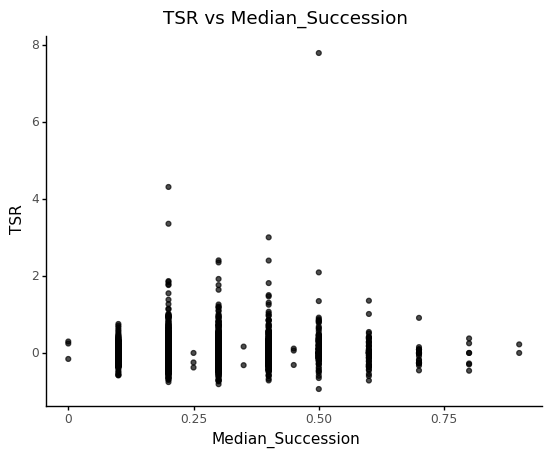

<ggplot: (8776995052966)>

In [11]:
(
ggplot(lux_df,aes(x="Median_Succession", y="TSR")) +
  geom_point(alpha = .7) + theme_classic() +
  labs(title="TSR vs Median_Succession",x="Median_Succession",y="TSR")
    
)

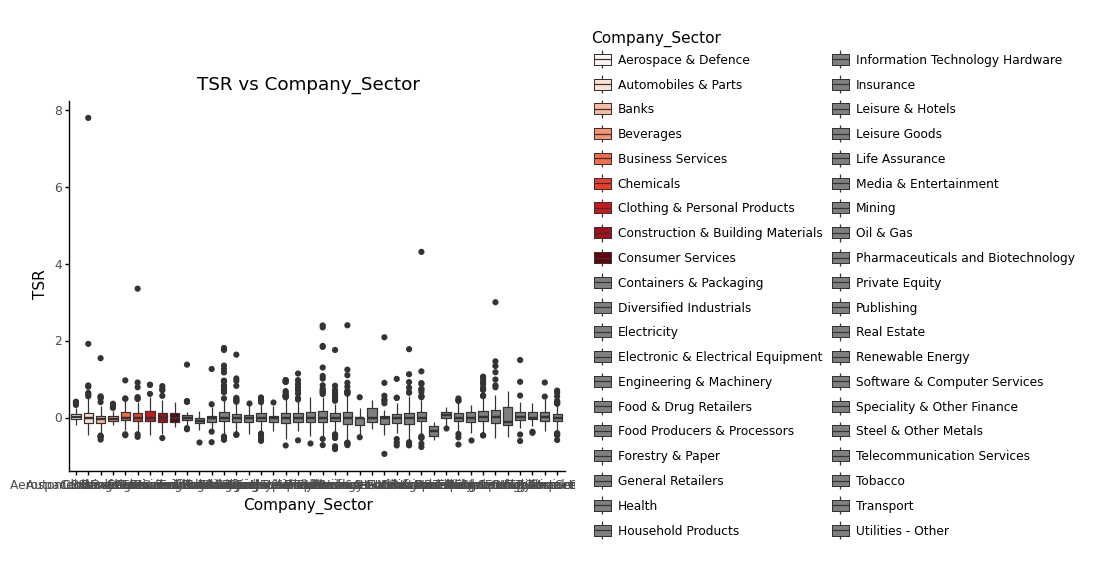

<ggplot: (8777027902955)>

In [12]:
(
ggplot(lux_df,aes(x="Company_Sector", y="TSR", fill="Company_Sector")) +
  geom_boxplot() + #coord_flip() +
  scale_fill_brewer(palette="Reds") +
  labs(title="TSR vs Company_Sector") + 
  theme_classic()
)

In [13]:
# (
# ggplot(lux_df,aes(x="Ticker", y="TSR", fill="Ticker")) +
#   geom_boxplot() + #coord_flip() +
#   scale_fill_brewer(palette="Reds") +
#   labs(title="TSR vs Ticker") + 
#   theme_classic()
# )

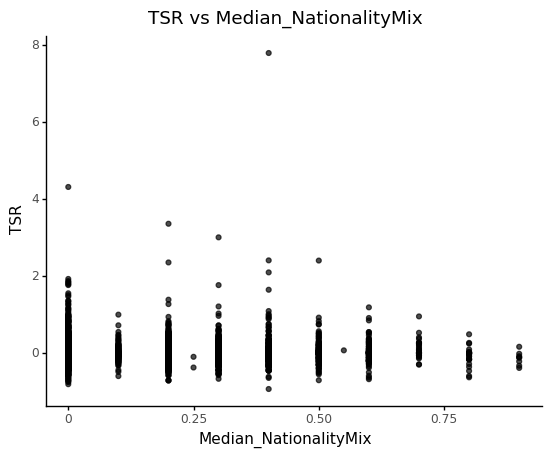

<ggplot: (8777027902013)>

In [14]:
(
ggplot(lux_df,aes(x="Median_NationalityMix", y="TSR")) +
  geom_point(alpha = .7) + theme_classic() +
  labs(title="TSR vs Median_NationalityMix",x="Median_NationalityMix",y="TSR")
    
)

In [16]:
# (
# ggplot(lux_df,aes(x="CEO_Name", y="TSR")) +
#   geom_boxplot() + #coord_flip() +
#   labs(title="TSR vs CEO_Name") + 
#   theme_classic()
# )

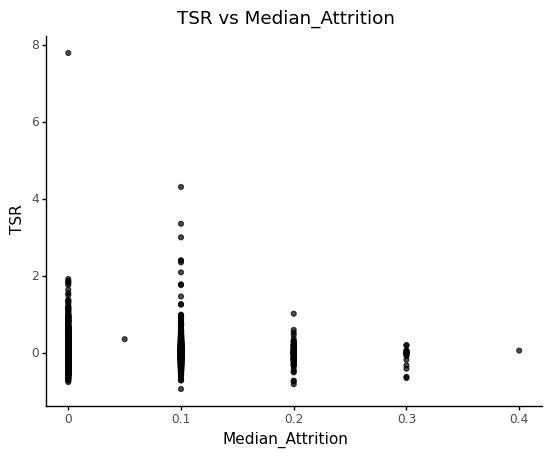

<ggplot: (8776997636852)>

In [17]:
(
ggplot(lux_df,aes(x="Median_Attrition", y="TSR")) +
  geom_point(alpha = .7) + theme_classic() +
  labs(title="TSR vs Median_Attrition",x="Median_Attrition",y="TSR")
    
)

In [18]:
########################################################################################################
#### Interaction Term Code Snippet: But need a categorical variable in the facet wrap.
#### No categorical variable currently in the dataset
########################################################################################################

In [19]:
# (
# ggplot(lux_df,aes(x="NetworkStrength", y="TSR", fill="NetworkStrength")) +
#   geom_boxplot() + coord_flip() +
#   scale_fill_brewer(palette="Reds") +
#   labs(title="TSR vs NetworkStrength:Diversity") +
#   theme_classic() + #theme(legend.position="none") +
#   #scale_x_discrete(labels=c(“0” = “No”,“1” = “Yes”)) +
#   facet_wrap("Diversity")
# )

### Data Modelling 

In [20]:
df.columns

Index(['CEO_Name', 'Ticker', 'YearOfReport', 'Tenure', 'Median_NetworkSize',
       'Std_NetworkSize', 'NetworkStrength', 'Median_IndustryExperience',
       'Std_IndustryExperience', 'Company_Sector', 'IndExp', 'Median_TimeRole',
       'Std_TimeRole', 'Std_Age', 'Mean_DoctorateDegree',
       'Mean_UndergraduateDegree', 'Mean_GraduateDegree', 'Mean_is_MBA',
       'Mean_is_exec_MBA', 'Mean_is_non_exec_MBA', 'Cohesion',
       'Median_GenderRatio', 'Median_NationalityMix', 'Diversity',
       'Median_TimeBrd', 'Std_TimeBrd', 'Median_Succession',
       'Median_Attrition', 'Median_ManualAttrition',
       'Median_ManualAccumulation', 'Stability', 'TSR'],
      dtype='object')

In [31]:
model = smf.mixedlm("TSR ~ Median_ManualAttrition", df, groups=df["Tenure"]).fit(method=["lbfgs"])
model.summary()

/Users/ashish/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning:The MLE may be on the boundary of the parameter space.
/Users/ashish/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning:The Hessian matrix at the estimated parameter values is not positive definite.


<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
===========================================================================
Model:                     MixedLM        Dependent Variable:        TSR   
No. Observations:          4395           Method:                    REML  
No. Groups:                45             Scale:                     0.0915
Min. group size:           1              Log-Likelihood:            inf   
Max. group size:           489            Converged:                 Yes   
Mean group size:           97.7                                            
---------------------------------------------------------------------------
                       Coef.   Std.Err.   z    P>|z|    [0.025     0.975]  
---------------------------------------------------------------------------
Intercept               0.003 72439.268  0.000 1.000 -141978.354 141978.360
Median_ManualAttrition -0.150     0.043 -3.465 0.001      -0.235     -0.065
Group Var               0.000                                              
===========================================================================

"""

### Get a list of significant features (P < 0.05)

In [33]:
# results_as_html = model.summary().tables[1].as_html()
# coef_table = pd.read_html(results_as_html, header=0, index_col=0)[0]

In [34]:
# coef_table[coef_table['P>|t|'] < 0.05]